# Brain Stroke Detection #

#### 1. Exploratory Data Analysis(EDA)

Importing Libraries and Loading the Data

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data=pd.read_csv('brain_stroke.csv')

In [3]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


Displaying first 5 rows of the dataset

In [4]:
data.info() #displaying information of our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [5]:
data.isnull().sum() #checking for total null values

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [6]:
data.isnull().sum() #checking for total null values

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [7]:
data = data.drop(["ever_married", "work_type", "Residence_type"], axis =1)

We have dropped the unnecessary attributes in the dataset.

Let's visualize the data and see the features that could be used for the prediction of stroke label

In [8]:
data.head()

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,105.92,32.5,never smoked,1
2,Female,49.0,0,0,171.23,34.4,smokes,1
3,Female,79.0,1,0,174.12,24.0,never smoked,1
4,Male,81.0,0,0,186.21,29.0,formerly smoked,1


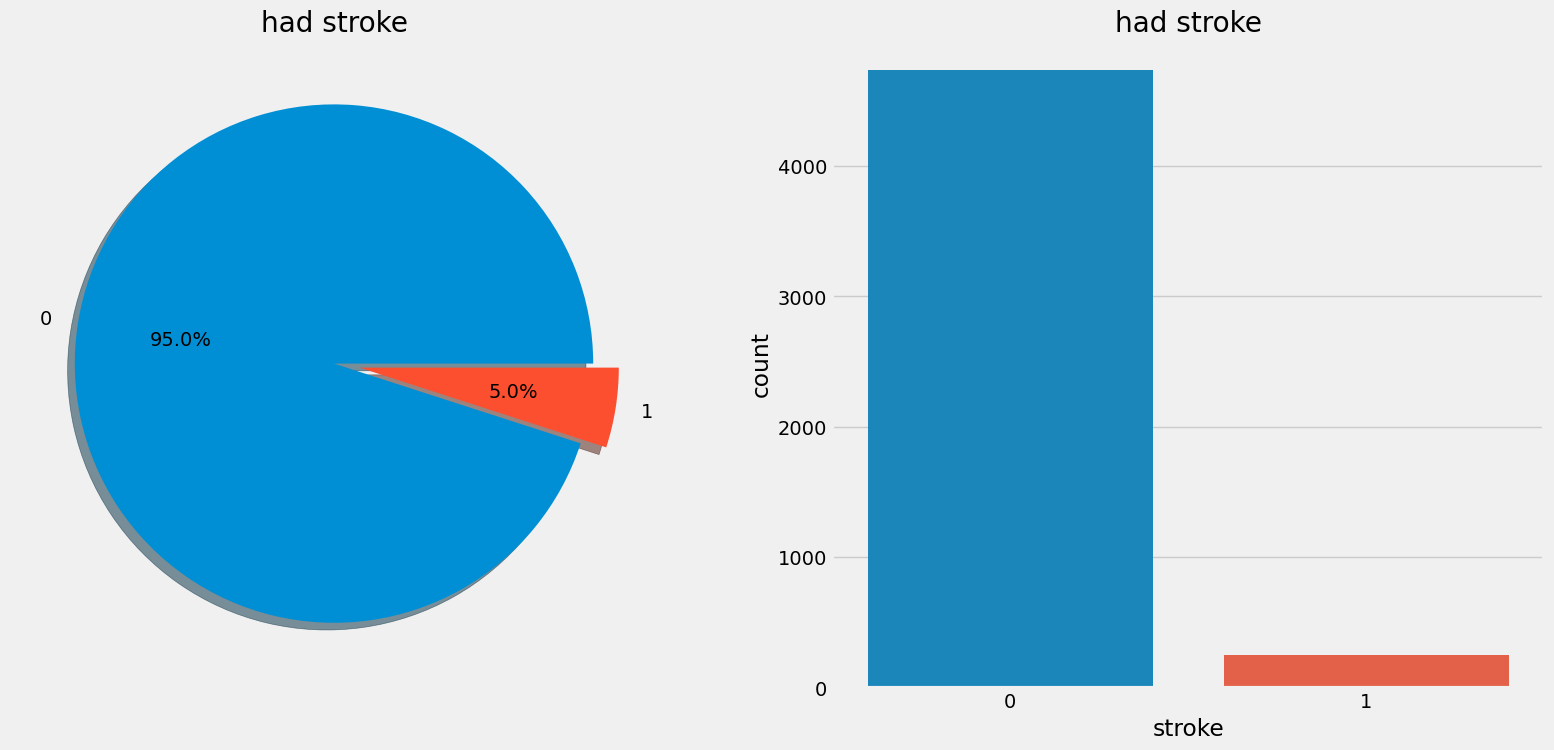

In [9]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['stroke'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('had stroke')
ax[0].set_ylabel('')
sns.countplot(x='stroke', ax=ax[1],data=data)
ax[1].set_title('had stroke')
plt.show()

The visualizations provide insights into the distribution of 'stroke' values in your dataset. The pie chart shows the proportion of classes (having a stroke or not), and the count plot provides a bar chart representation of the same information.

In [10]:
data.groupby(['gender','stroke'])['stroke'].count()

gender  stroke
Female  0         2767
        1          140
Male    0         1966
        1          108
Name: stroke, dtype: int64

For each gender ('Female' and 'Male'), the count of occurrences is provided for both classes of the 'stroke' variable (0 and 1).

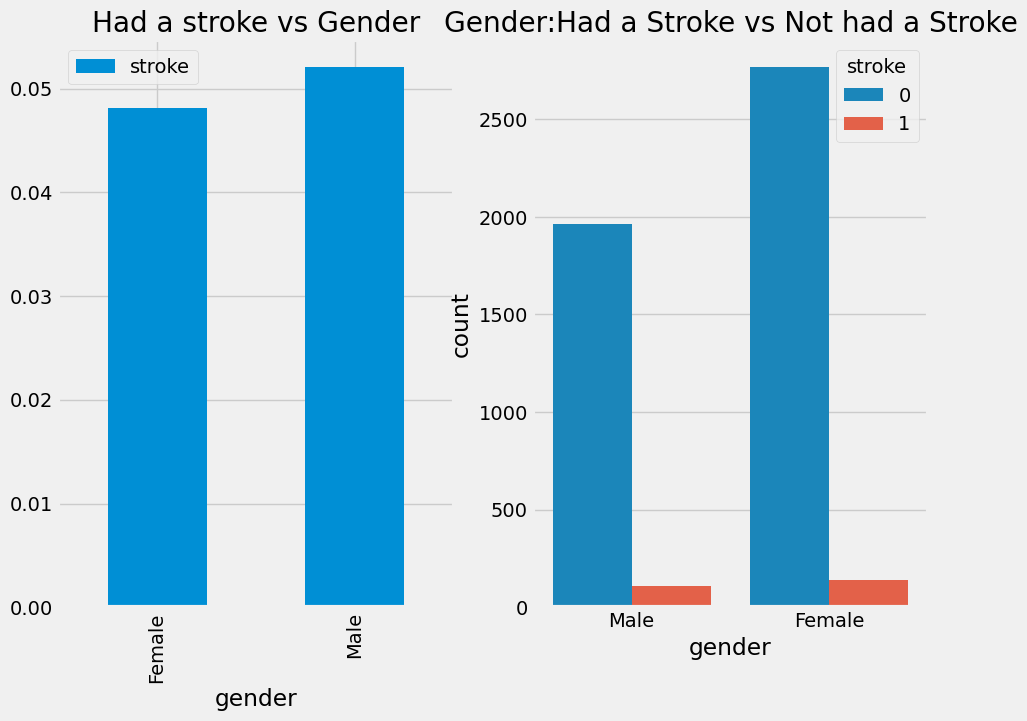

In [11]:
f,ax=plt.subplots(1,2,figsize=(10,7))
data[['gender','stroke']].groupby(['gender']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Had a stroke vs Gender')
sns.countplot(x='gender',hue='stroke',data=data,ax=ax[1])
ax[1].set_title('Gender:Had a Stroke vs Not had a Stroke')
plt.show()

Left plot Interpretation: This subplot shows the proportion of individuals who had a stroke for each gender. The y-axis represents the mean value of 'stroke,' indicating the likelihood of having a stroke.
Right plot interpretation: : This subplot provides a count of individuals for each gender, further broken down by whether they had a stroke (1) or not (0). The different colors in the bars represent the distribution of stroke occurrences within each gender.

In [12]:
data.groupby(['hypertension','stroke'])['stroke'].count()

hypertension  stroke
0             0         4320
              1          182
1             0          413
              1           66
Name: stroke, dtype: int64

This kind of grouped count can be useful for understanding the distribution of stroke occurrences across different levels of hypertension in your dataset.

In [13]:
pd.crosstab(data.smoking_status,data.stroke,margins=True).style.background_gradient(cmap='summer_r')

stroke,0,1,All
smoking_status,,,
Unknown,1453,47,1500
formerly smoked,797,70,867
never smoked,1749,89,1838
smokes,734,42,776
All,4733,248,4981


The styled table provides a visual representation of the relationship between smoking status and stroke occurrence

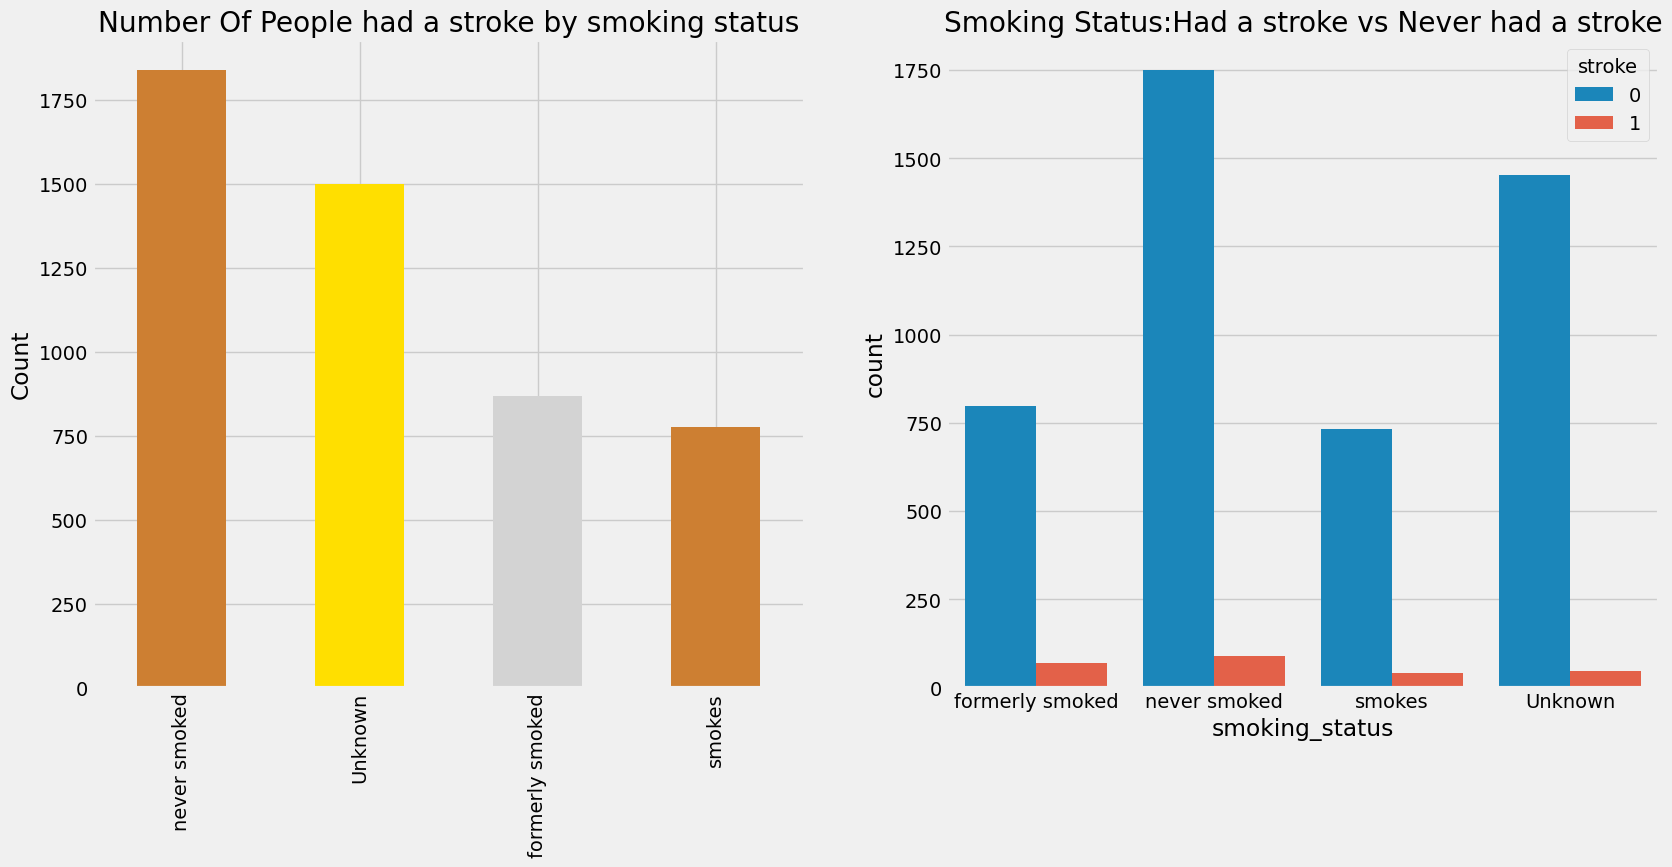

In [14]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['smoking_status'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of People had a stroke by smoking status')
ax[0].set_ylabel('Count')
sns.countplot(x='smoking_status',hue='stroke',data=data,ax=ax[1])
ax[1].set_title('Smoking Status:Had a stroke vs Never had a stroke')
plt.show()

Left plot interpretation: This subplot provides a visual representation of the number of people who had a stroke for each category of 'smoking_status'. Different colors represent different categories of smoking status.

Right plot interpretation: This subplot provides a count of individuals for each category of 'smoking_status', further broken down by whether they had a stroke (1) or not (0). It visually compares the distribution of stroke occurrences across different smoking statuses.

In [15]:
pd.crosstab([data.gender,data.stroke],data.smoking_status,margins=True).style.background_gradient(cmap='summer_r')

The table provides a visual representation of the joint distribution of 'gender,' 'stroke,' and 'smoking_status.

In [16]:
# See the min, max, mean values
print('Oldest Person was of:',data['age'].max(),'Years')
print('Youngest Person was of:',data['age'].min(),'Years')
print('Average Age in the data:',data['age'].mean(),'Years')

Oldest Person was of: 82.0 Years
Youngest Person was of: 0.08 Years
Average Age in the data: 43.41985946597069 Years


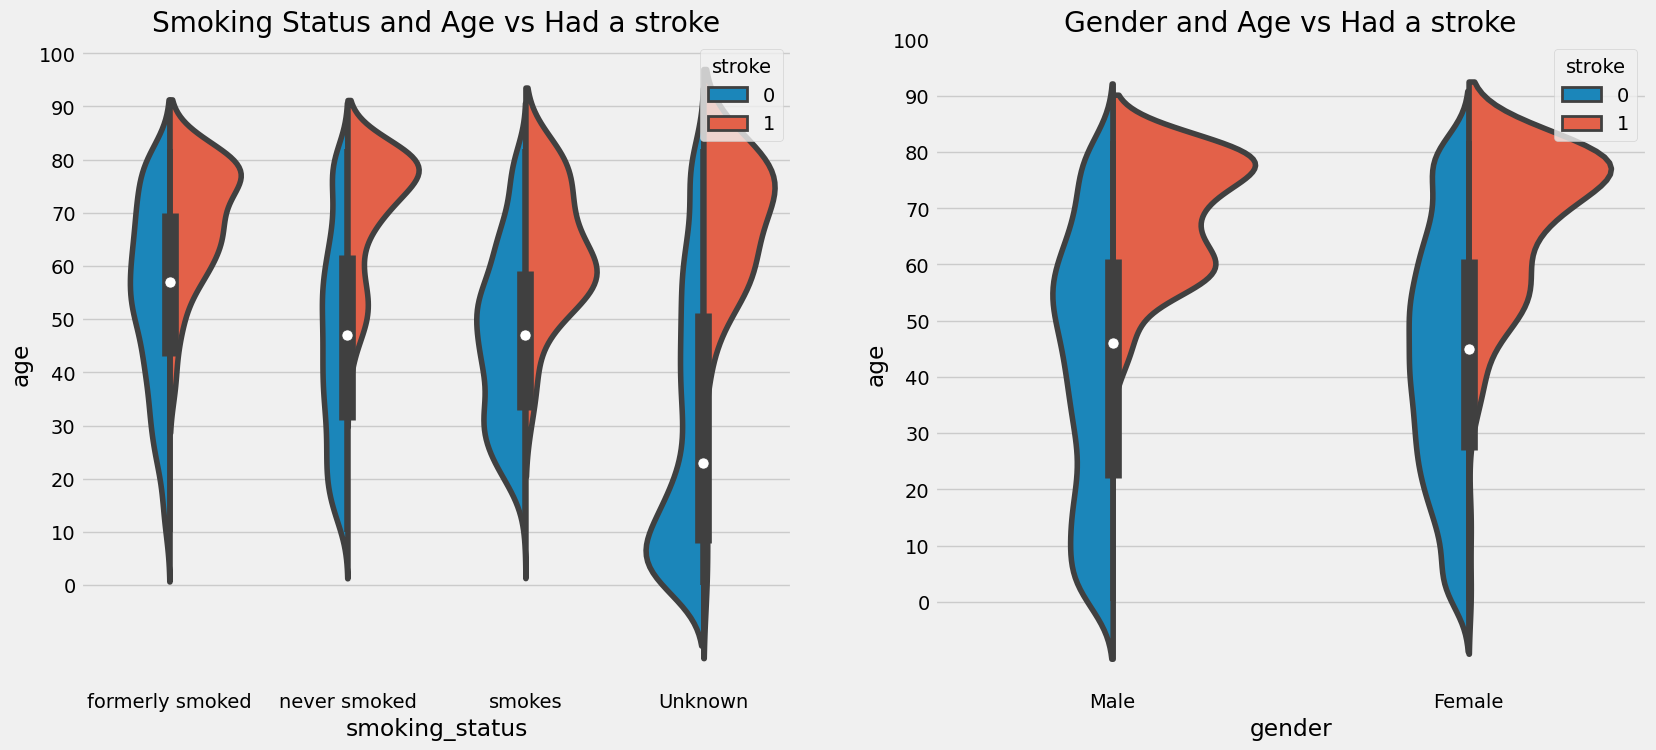

In [17]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x="smoking_status",y="age", hue="stroke", data=data,split=True,ax=ax[0])
ax[0].set_title('Smoking Status and Age vs Had a stroke')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x="gender",y="age", hue="stroke", data=data,split=True,ax=ax[1])
ax[1].set_title('Gender and Age vs Had a stroke')
ax[1].set_yticks(range(0,110,10))
plt.show()

Left plot Interpretation: This subplot helps visualize the distribution of ages for different smoking statuses, split by whether individuals had a stroke or not.
Right plot Interpretation: This subplot visualizes the distribution of ages for different genders, split by whether individuals had a stroke or not.

In [18]:
print('Maximum "Average Glucose Level" in data:',data['avg_glucose_level'].max())
print('Minimum "Average Glucose Level" in data:',data['avg_glucose_level'].min())
print('Average "Average Glucose Level" in data:',data['avg_glucose_level'].mean())
print("***************************************")
print('Maximum "BMI" in data:',data['bmi'].max())
print('Minimum "BMI" in data:',data['bmi'].min())
print('Average "BMI" in data:',data['bmi'].mean())

Maximum "Average Glucose Level" in data: 271.74
Minimum "Average Glucose Level" in data: 55.12
Average "Average Glucose Level" in data: 105.94356153382854
***************************************
Maximum "BMI" in data: 48.9
Minimum "BMI" in data: 14.0
Average "BMI" in data: 28.498173057618956


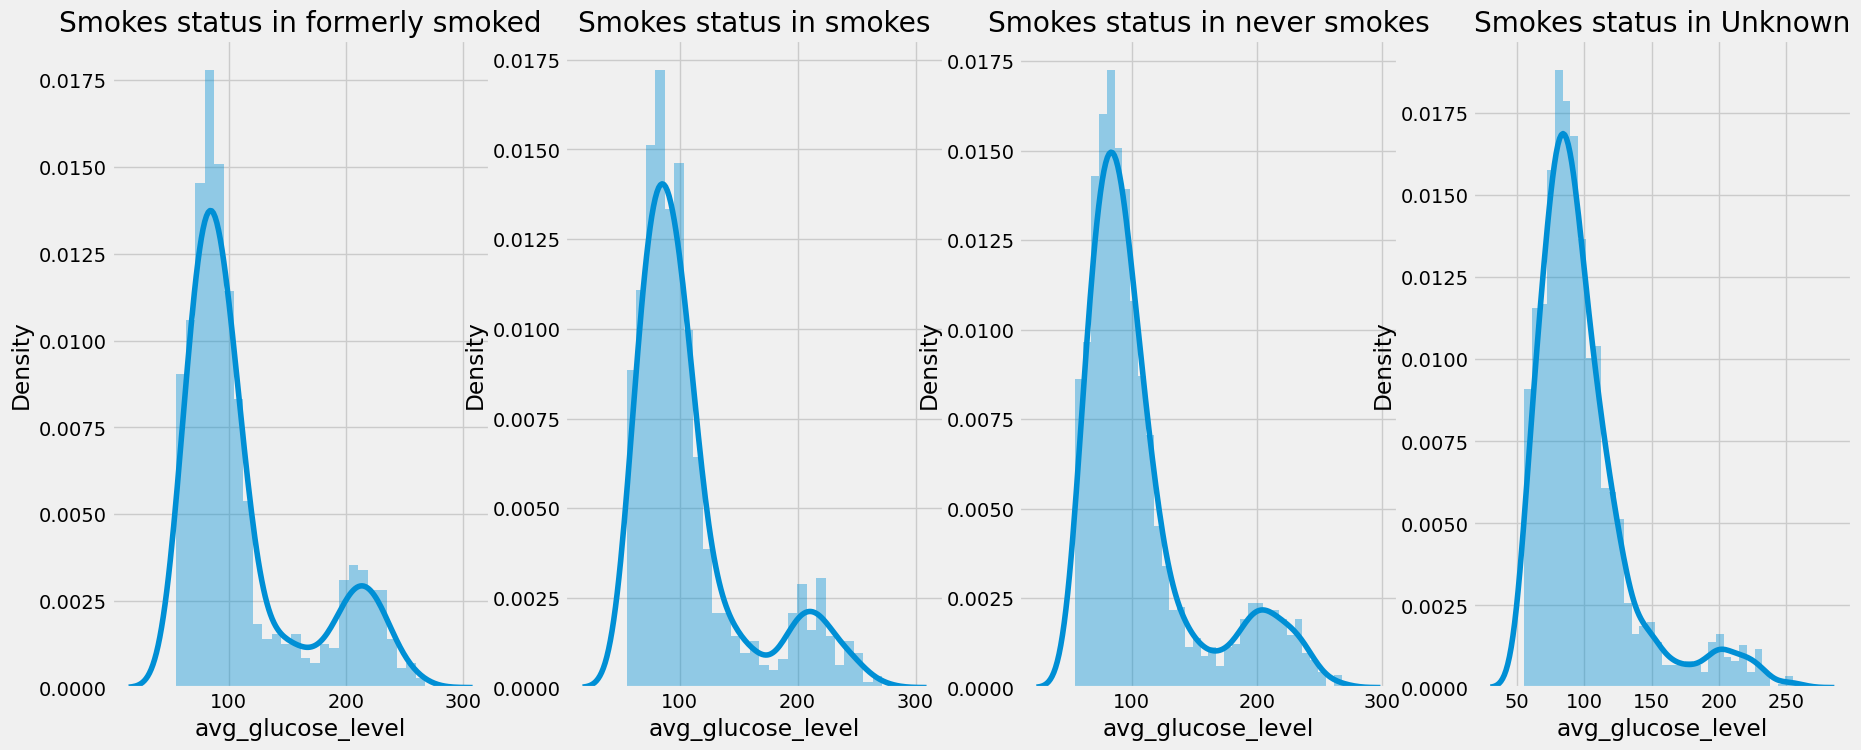

In [19]:
f,ax=plt.subplots(1,4,figsize=(20,8))
sns.distplot(data[data['smoking_status']=="formerly smoked"].avg_glucose_level,ax=ax[0])
ax[0].set_title('Smokes status in formerly smoked')
sns.distplot(data[data['smoking_status']=="smokes"].avg_glucose_level,ax=ax[1])
ax[1].set_title('Smokes status in smokes')
sns.distplot(data[data['smoking_status']== "never smoked"].avg_glucose_level,ax=ax[2])
ax[2].set_title('Smokes status in never smokes')
sns.distplot(data[data['smoking_status']== "Unknown"].avg_glucose_level,ax=ax[3])
ax[3].set_title('Smokes status in Unknown')
plt.show()

The visualizations help compare the distribution of average glucose levels across different categories of smoking status. It provides insights into how average glucose levels are distributed within each smoking status category.

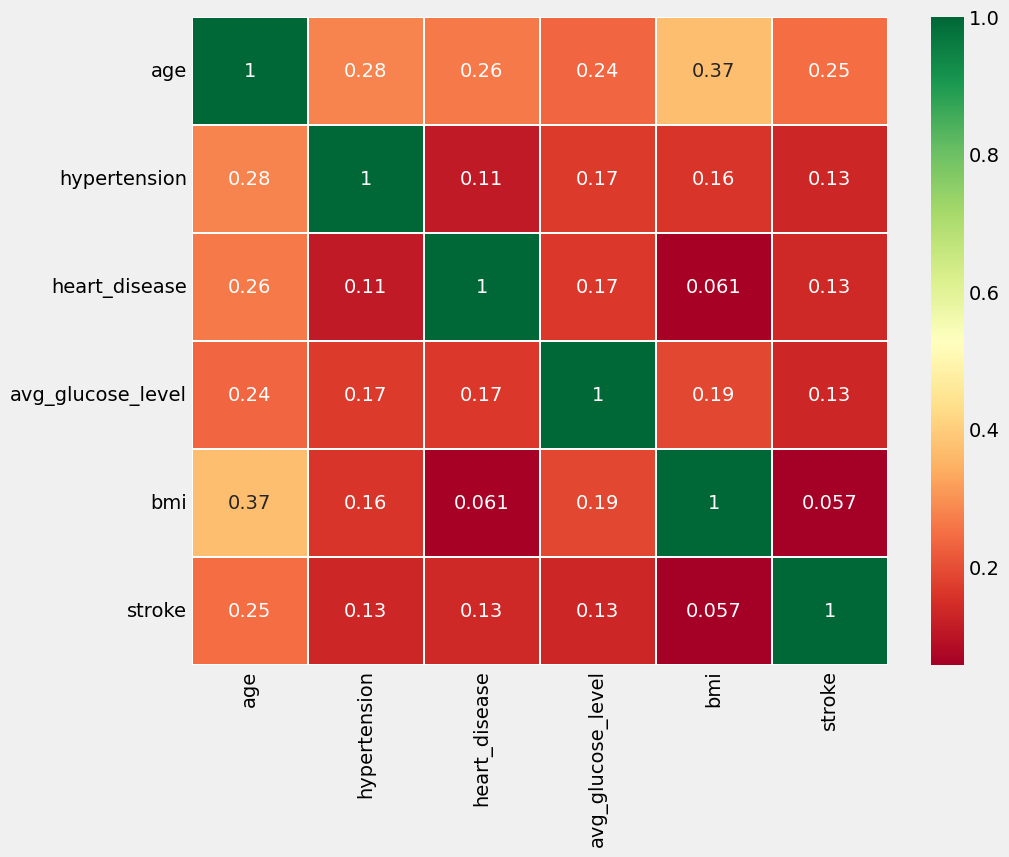

In [20]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()



Color Intensity: The color intensity in the heatmap represents the strength of correlation. Darker shades indicate stronger correlations, while lighter shades indicate weaker correlations.
Annotations: The numerical values within the cells are the correlation coefficients. These values range from -1 to 1.
Positive Correlation: Positive values (closer to 1) indicate a positive linear relationship between the variables. 
An increase in one variable is associated with an increase in the other.
Negative Correlation: Negative values (closer to -1) indicate a negative linear relationship between the variables. An increase in one variable is associated with a decrease in the other.
No Correlation: Values close to 0 suggest little or no linear relationship between the variables.

This heatmap is useful for identifying potential patterns and relationships between different numeric variables in the dataset.

In [21]:
data.insert(2,'age_band', np.zeros)

In [22]:
data.loc[data['age']<=16,'age_band']=0
data.loc[(data['age']>16)&(data['age']<=32),'age_band']=1
data.loc[(data['age']>32)&(data['age']<=48),'age_band']=2
data.loc[(data['age']>48)&(data['age']<=64),'age_band']=3
data.loc[data['age']>64,'age_band']=4
data.drop(columns= "age", inplace=True)
data["age_band"]=data['age_band'].astype(str).astype(int)
data.head()

,gender,age_band,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,Male,4,0,1,228.69,36.6,formerly smoked,1
1,Male,4,0,1,105.92,32.5,never smoked,1
2,Female,3,0,0,171.23,34.4,smokes,1
3,Female,4,1,0,174.12,24.0,never smoked,1
4,Male,4,0,0,186.21,29.0,formerly smoked,1


This can be useful for certain analyses, especially when age-specific patterns or trends are of interest. The age bands may help simplify and capture specific age-related patterns in the data.

In [23]:
data['age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')#checking the number of people in each band

,age_band
3,1229
2,1067
4,1020
1,895
0,770


In [24]:
# copy the data
data = data.copy()
  
# apply normalization techniques on Columns
column = 'avg_glucose_level'
column2 = 'bmi'
data[column] = data[column] /data[column].abs().max()
data[column2] = data[column2] /data[column2].abs().max()
  
# view normalized data
display(data[column], data[column2])

0       0.841577
1       0.389784
2       0.630124
3       0.640760
4       0.685251
          ...   
4976    0.258151
4977    0.703430
4978    0.349672
4979    0.308898
4980    0.308199
Name: avg_glucose_level, Length: 4981, dtype: float64

0       0.748466
1       0.664622
2       0.703476
3       0.490798
4       0.593047
          ...   
4976    0.609407
4977    0.635992
4978    0.650307
4979    0.613497
4980    0.595092
Name: bmi, Length: 4981, dtype: float64

In [25]:
data['gender'].replace(['Male','Female'],[0,1],inplace=True)
data['gender'].head()

0    0
1    0
2    1
3    1
4    0
Name: gender, dtype: int64

In [26]:
data["smoking_status"].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

It is an list containing the unique values present in the "smoking_status" column of the dataset.

In [27]:
data['smoking_status'].replace(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],[0,1,2,3],inplace=True)
data['smoking_status'].head()

0    0
1    1
2    2
3    1
4    0
Name: smoking_status, dtype: int64

The code converts the categorical values representing smoking statuses into numerical equivalents. This transformation is often done for numerical analysis or machine learning algorithms that work with numerical inputs

In [28]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [29]:
train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data['stroke'])
train_X=train[train.columns[:-1]]
train_Y=train[train.columns[-1:]]
test_X=test[test.columns[:-1]]
test_Y=test[test.columns[-1:]]
X=data[data.columns[:-1]]
Y=data["stroke"]
len(train_X), len(train_Y), len(test_X), len(test_Y)

(3486, 3486, 1495, 1495)

The code splits the dataset into training and testing sets, making it ready for machine learning model training and evaluation.
Features and target variables are appropriately separated for both training and testing sets.

In [30]:
print(train_X)

      gender  age_band  hypertension  heart_disease  avg_glucose_level  \
4103       0         4             0              0           0.316405   
1999       1         0             0              0           0.303194   
1074       1         4             0              0           0.250092   
1264       1         3             0              0           0.325348   
2914       1         3             0              0           0.329690   
...      ...       ...           ...            ...                ...   
1522       1         3             0              1           0.765622   
2808       1         0             0              0           0.301465   
4547       1         0             0              0           0.270406   
4593       1         2             0              0           0.254140   
1512       1         2             0              0           0.378634   

           bmi  smoking_status  
4103  0.572597               3  
1999  0.349693               1  
1074  0.5480

In [31]:
print(train_Y)

      stroke
4103       0
1999       0
1074       0
1264       0
2914       0
...      ...
1522       0
2808       0
4547       0
4593       0
1512       0

[3486 rows x 1 columns]


In [32]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.9505016722408027


The Logistic Regression model achieved an accuracy of approximately 95.05% on the test dataset.
The accuracy score represents the proportion of correctly predicted instances out of the total instances in the test dataset.
This is a high accuracy which indicates that the model performed well in predicting the target variable values on unseen data.
The accuracy score is a common metric for classification models, providing a straightforward measure of predictive performance.

In [33]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.9137123745819398


The Decision Tree Classifier model achieved an accuracy of approximately 91.04% on the test dataset.

In [34]:
model=KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the KNN is 0.9444816053511705


The K Nearest Neighbors Classifier model achieved an accuracy of approximately 94.44% on the test dataset which says model is performing well.

In [35]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.862876254180602


The Gausian Naive Bayes Model achieved an accuracy of approximately 86.28% on the test dataset.

In [36]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))


The accuracy of the Random Forests is 0.9438127090301003


The Random Forest Classifier model achieved an accuracy of approximately 94.44% on the test dataset which says model is performing well.

In [37]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10) # k=10, split the data into 10 equal parts
cv_mean=[]
accuracy=[]
std=[]
classifiers=['Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    cv_mean.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':cv_mean,'Std':std},index=classifiers)       
new_models_dataframe2


,CV Mean,Std
Logistic Regression,0.950285,0.124694
KNN,0.949080,0.124239
Decision Tree,0.902091,0.108139
Naive Bayes,0.859911,0.078227
Random Forest,0.942052,0.121872


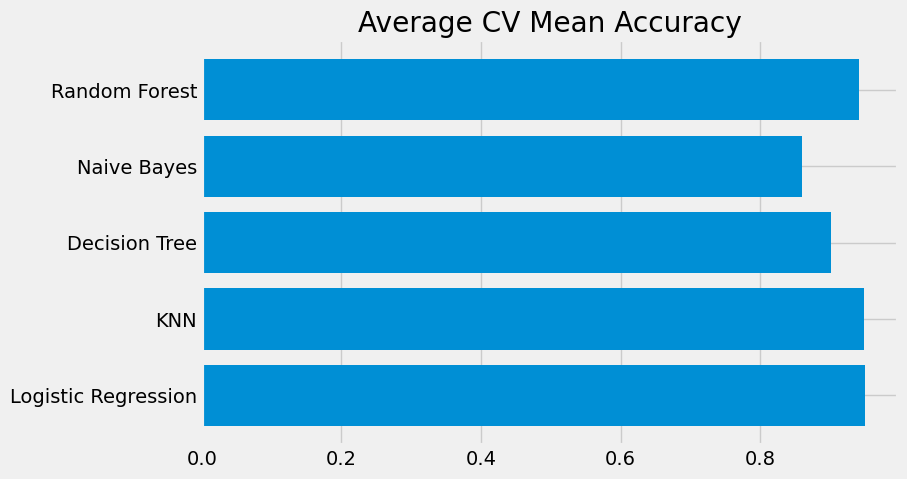

In [38]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

Considering, Logistic Regression as the best model in terms of accuracy, we are now going to estimate the significance of each attribute and determine the ranking order

In [42]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.9505016722408027


In [43]:
# Step 5: Get feature coefficients
feature_coefficients = model.coef_[0]

# Step 6: Create a DataFrame with feature names and their corresponding coefficients
feature_coefficient_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': feature_coefficients})

# Step 7: Sort the DataFrame by coefficients in descending order
feature_coefficient_df = feature_coefficient_df.sort_values(by='Coefficient', ascending=False)

# Step 8: Print or display the ranking order
print("Feature Ranking:")

print(feature_coefficient_df)

Feature Ranking:
             Feature  Coefficient
1           age_band     1.187519
4  avg_glucose_level     0.880860
2       hypertension     0.551390
3      heart_disease     0.288187
0             gender     0.073007
6     smoking_status    -0.053451
5                bmi    -0.211967



The feature ranking provided by the logistic regression model with their corresponding coefficients gives insights into the impact of each feature on the likelihood of the target variable. In logistic regression, the coefficients represent the change in the log-odds of the target variable for a one-unit change in the corresponding feature.


The feature ranking provided by the logistic regression model with their corresponding coefficients gives insights into the impact of each feature on the likelihood of the target variable. In logistic regression, the coefficients represent the change in the log-odds of the target variable for a one-unit change in the corresponding feature.

Here's an interpretation of the feature ranking :

1)age_band (Coefficient: 1.187519):

For every one-unit increase in the age_band, the log-odds of the target variable increase by approximately 1.187519.
Older age is associated with a higher likelihood of the target variable.

2)avg_glucose_level (Coefficient: 0.880860):

For every one-unit increase in avg_glucose_level, the log-odds of the target variable increase by approximately 0.880860.
Higher average glucose levels are associated with a higher likelihood of the target variable.


3)hypertension (Coefficient: 0.551390):

Individuals with hypertension have a log-odds of the target variable approximately 0.551390 higher than those without hypertension.
Hypertension is associated with a higher likelihood of the target variable.


4)heart_disease (Coefficient: 0.288187):

Individuals with heart disease have a log-odds of the target variable approximately 0.288187 higher than those without heart disease.
Heart disease is associated with a higher likelihood of the target variable.


5)gender (Coefficient: 0.073007):

 Being of the male gender is associated with a log-odds of the target variable approximately 0.073007 higher than being of the female gender.
Gender has a positive but relatively small association with the likelihood of the target variable.


6)smoking_status (Coefficient: -0.053451):

For every one-unit increase in smoking_status, the log-odds of the target variable decrease by approximately 0.053451.
Smoking is associated with a lower likelihood of the target variable.


7)bmi (Coefficient: -0.211967):

 For every one-unit increase in BMI, the log-odds of the target variable decrease by approximately 0.211967.
 Higher BMI is associated with a lower likelihood of the target variable.